In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from sklearn.model_selection import train_test_split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 64, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [10]:
df=pd.read_csv('USA_Housing.csv',usecols=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'])
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [45]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

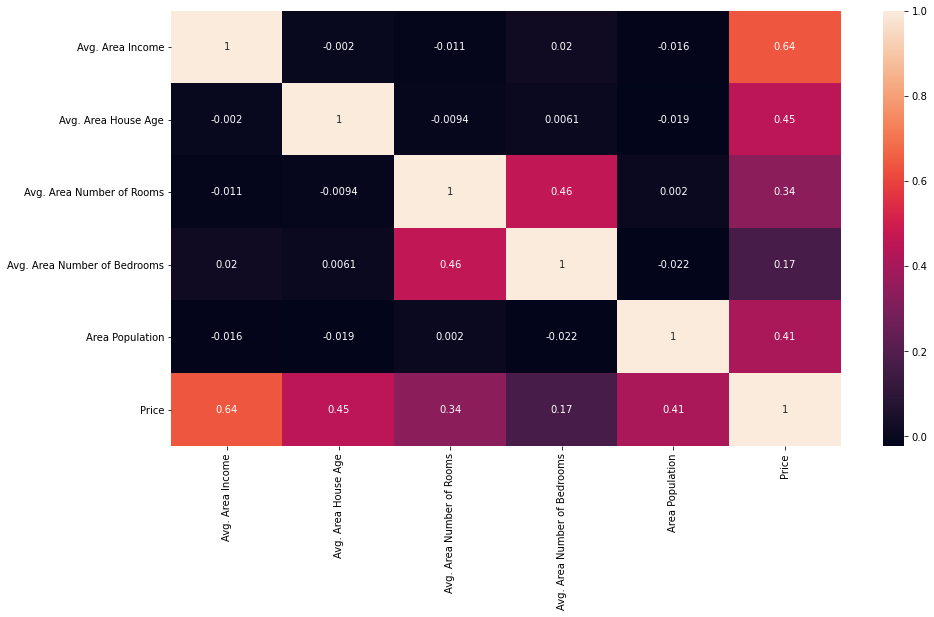

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

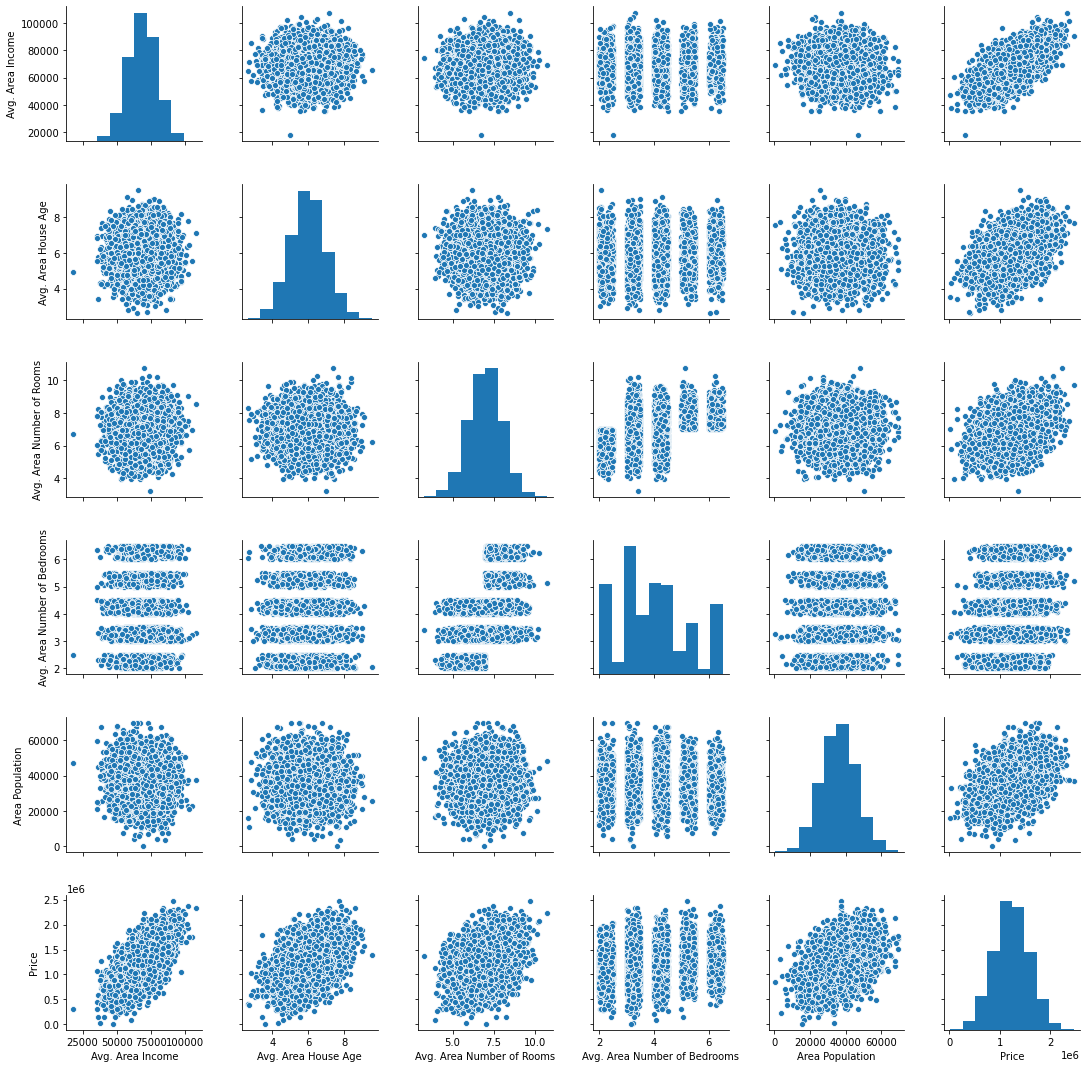

In [47]:
sns.pairplot(df)

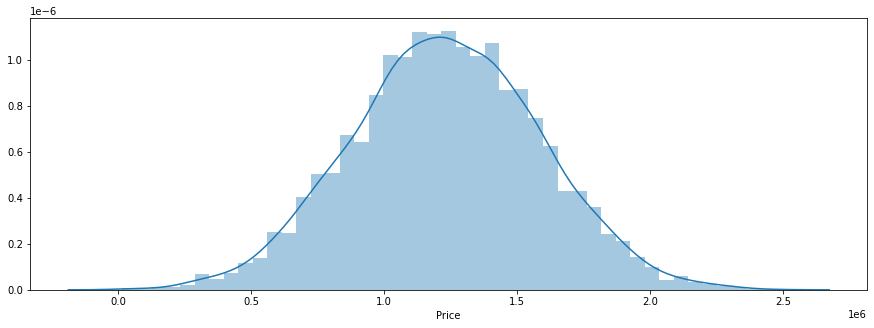

In [48]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price'])

In [49]:
x=df.iloc[:,:-1]
y=df[['Price']]         # This is a target variable


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=101)

In [52]:
print(X_test.shape)
print(X_train.shape)
print(df.shape)

(1500, 5)
(3500, 5)
(5000, 6)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [54]:
lr= LinearRegression()
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test) 


In [82]:
ytest=list(y_test.values)
ypred=list(y_pred)

In [85]:
predicted_df.shape[0]

1500

In [90]:
predicted_df=pd.DataFrame({'y_test':ytest,'y_pred':ypred})
predicted_df

,y_test,y_pred
0,[1251688.6157028743],[1258934.8950529094]
1,[873048.3196423554],[822694.634110441]
2,[1696977.6628325956],[1742214.3953012088]
3,[1063964.287873947],[972937.0046516028]
4,[948788.2757094484],[994545.9915774819]
...,...,...
1495,[704375.8684056341],[755564.9598366683]
1496,[1254938.142307008],[1168110.123687706]
1497,[1434323.8251566691],[1452640.964733377]
1498,[534077.4554759212],[645797.1302631218]


ValueError: x and y must be the same size

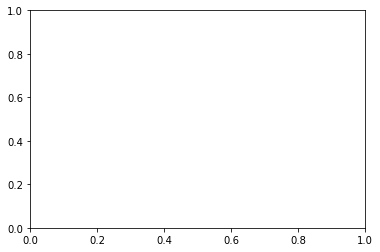

In [97]:
plt.scatter(predicted_df.index[10],predicted_df['y_test'][1:11])


In [96]:
predicted_df['y_test'][1:11]

1      [873048.3196423554]
2     [1696977.6628325956]
3      [1063964.287873947]
4      [948788.2757094484]
5      [730043.6450595969]
6     [1166925.1461488248]
7      [705444.1167909042]
8     [1499988.8795226102]
9     [1288199.1527291734]
10    [1441736.7608375724]
Name: y_test, dtype: object

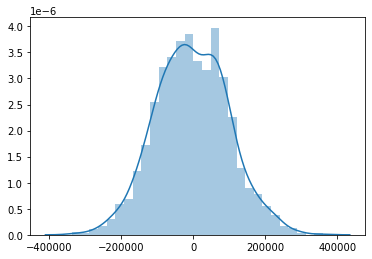

In [14]:
sns.distplot((y_test-y_pred))

In [15]:
mean_absolute_error(y_test,y_pred)

81257.55795855928

In [16]:
mean_squared_error(y_test,y_pred)**0.5

100842.0823163503

In [17]:
print(lr.intercept_)

[-2641372.66730139]


In [18]:
coeff=lr.coef_

In [19]:
print(lr.coef_)

[[2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
  1.52251955e+01]]


In [20]:
# cdf=pd.DataFrame({'Dependent':x.columns,'Coeff':coeff})
# cdf

In [21]:
# Now  we are going to apply new methiod using sdandard scaler function

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()

X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

lr= LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [24]:
X_test

array([[-0.15724937, -0.26070975,  0.81236266,  0.28958094,  0.06433623],
       [-0.5906463 , -1.07012835,  0.44502516,  1.83456401, -1.02211455],
       [ 0.49118216,  0.81291977,  1.35395569, -0.50730507,  0.70560051],
       ...,
       [-0.809958  ,  2.17327857, -0.72004626, -1.49934683,  0.984456  ],
       [-0.88845827,  0.18980914, -1.6807763 , -1.38550597, -1.34512805],
       [-0.37139657,  0.42196024,  0.56870198,  1.71259166,  0.54126242]])

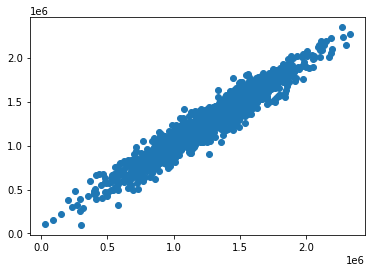

In [25]:
plt.scatter(y_test,y_pred)

In [26]:
print('Coefficient :',lr.coef_)
print('Intercept :',lr.intercept_)
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))
print('RMSE :',mean_squared_error(y_test,y_pred)**0.5)
accuracy=lr.score(X_test,y_test)
print('accuracy LinearRegressor(%):',accuracy)

Coefficient : [[228969.81200101 161540.13671731 121467.58123584   1621.74313288
  151077.09352959]]
Intercept : [1228190.25983783]
MAE : 81257.55795855967
MSE : 10169125565.89762
RMSE : 100842.08231635054
accuracy LinearRegressor(%): 0.9185060945363621


In [27]:
x=df['Avg. Area Income'].values
x

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367])

In [28]:
y=df['Price'].values
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [29]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [30]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [31]:
X_test.shape

(1650, 1)

In [32]:
lr.fit(X_train,y_train)

yy_pred=lr.predict(X_test)
yy_pred


array([[1088021.09192897],
       [ 987393.43586174],
       [1263595.27462058],
       ...,
       [1011952.85442973],
       [1447492.56118544],
       [ 994001.22481979]])

In [33]:
X_train

array([[67716.74822238],
       [78095.35262991],
       [55577.07175426],
       ...,
       [66195.33771401],
       [58694.51501745],
       [61162.58025422]])

In [34]:
# Now again checking my testing library for linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [36]:

# lis=[x**2 for x in range(100,110)]
# lis

In [37]:
df=pd.DataFrame({'Position':['Business Analyst','Junior Consultant','Senior Consultant','Manager','Country Manager','Region Manager','Partner','Senior Partner','C-level','CEO'],'Level':np.arange(1,11),'Salary':['45000','50000','60000','80000','110000','150000','200000','300000','500000','1000000']})
df


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [38]:
real_x=df.iloc[:,1:2].values
real_y=df.iloc[:,2].values


In [39]:
# lr=LinearRegression()
# lr.fit(x,y)


In [40]:
reg=DecisionTreeRegressor(random_state=0)
reg.fit(real_x,real_y)

DecisionTreeRegressor(random_state=0)

In [41]:
# y_pred=reg.predict()

In [42]:
reg.predict(x_grid)

NameError: name 'x_grid' is not defined

In [ ]:
plt.figure(figsize=(15,8))
x_grid=np.arange(min(real_x),max(real_x),0.01)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(real_x,real_y, color='green')
plt.plot(x_grid,reg.predict(x_grid),color='blue')
plt.title('DecisionTreeRegressor')
plt.xlabel('Poision level')
plt.ylim(0,1000010)

plt.ylabel('Salary')

In [1]:
# Now use SVM model to predict Google stock price

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


In [3]:
df=pd.read_csv('GOOG.csv')
df=df.iloc[1268:1288]

In [4]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
1268,2019-09-03,1177.030029,1186.890015,1163.199951,1168.390015,1168.390015,1479900
1269,2019-09-04,1176.709961,1183.479980,1171.000000,1181.410034,1181.410034,1068900
1270,2019-09-05,1191.530029,1213.040039,1191.530029,1211.380005,1211.380005,1408100
1271,2019-09-06,1208.130005,1212.015015,1202.521973,1204.930054,1204.930054,1072100
1272,2019-09-09,1204.000000,1220.000000,1192.619995,1204.410034,1204.410034,1471900
1273,2019-09-10,1195.150024,1210.000000,1194.579956,1206.000000,1206.000000,1260100
1274,2019-09-11,1203.410034,1222.599976,1202.199951,1220.170044,1220.170044,1307000
1275,2019-09-12,1224.300049,1241.859985,1223.020020,1234.250000,1234.250000,1725900
1276,2019-09-13,1231.349976,1240.880005,1227.010010,1239.560059,1239.560059,1301400
1277,2019-09-16,1229.520020,1239.560059,1225.609985,1231.300049,1231.300049,1053300


In [110]:
df_dates=df.loc[:,'Date'].values
prices=df.loc[:,'Open'].values


In [111]:
df_dates

array(['2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
       '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
       '2019-09-13', '2019-09-16', '2019-09-17', '2019-09-18',
       '2019-09-19', '2019-09-20', '2019-09-23', '2019-09-24',
       '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-30'],
      dtype=object)

In [112]:
dates=[]
for dt in df_dates:
     dates.append(int(dt.split('-')[2]))

In [113]:
dates=np.asarray(dates) # Converting list into an array

In [114]:
dates

array([ 3,  4,  5,  6,  9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25,
       26, 27, 30])

In [115]:
# lmd= lambda x: x.str.split('-')[2]
# df_dates=df_dates.apply(lmd)
# df_dates

In [116]:
dates=dates.reshape(-1,1)
prices=prices.reshape(-1,1)

In [117]:
# # Creating the list of dates and Price
# dates=[]
# prices=[]

# # Creat the independent data set X
# for date in df_dates:
#     dates.append(int(date.split('-')[2]))
    
# # Creat the dependent data set 'y'   
# for open_price in df_open:
#     prices.append(float(open_price))
    

In [118]:
def predict_prices(dates,prices,x):
    # Create the 3 svr
#     svr_lin= SVR(kernel='linear',C=1e3)
#     svr_poly=SVR(kernel='poly',C=1e3, degree=2)
    svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
    
    # Train the SVR Model
#     svr_lin.fit(dates,prices)
#     svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    # Create the linear regression model
    lin_reg=LinearRegression()
    lin_reg.fit(dates,prices)
    
    # Plot the models on a graph to see which has the best fit
    plt.figure(figsize=(15,8))
    plt.scatter(dates, prices, color='black',label='Data')
#     plt.plot(dates,svr_lin.predict(dates),color='red',label='SVR_lin')
#     plt.plot(dates,svr_poly.predict(dates),color='blue',label='SVR_poly')
    plt.plot(dates,svr_rbf.predict(dates),color='orange',label='SVR_RBF')
    plt.plot(dates,lin_reg.predict(dates),color='green',label='lin_reg')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Regression')
    plt.legend()
    plt.show()
    
    
    return svr_rbf.predict(x)[0],lin_reg.predict(x)[0]
    

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


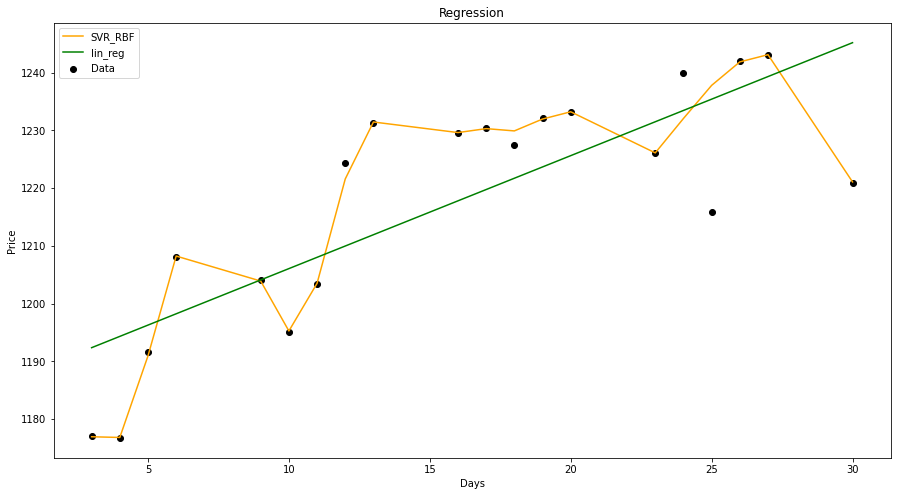

(1238.92477063097, array([1241.27341843]))


In [119]:
# Predict the GOOG on day 28
predict_price=predict_prices(dates,prices,[[28]])
print(predict_price)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

C:\Users\Zeeshan Haleem\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Zeeshan Haleem\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [130]:
df=pd.read_csv('GOOG.csv')
df=df.iloc[1268:1288]
df

,Date,Open,High,Low,Close,Adj Close,Volume
1268,2019-09-03,1177.030029,1186.890015,1163.199951,1168.390015,1168.390015,1479900
1269,2019-09-04,1176.709961,1183.479980,1171.000000,1181.410034,1181.410034,1068900
1270,2019-09-05,1191.530029,1213.040039,1191.530029,1211.380005,1211.380005,1408100
1271,2019-09-06,1208.130005,1212.015015,1202.521973,1204.930054,1204.930054,1072100
1272,2019-09-09,1204.000000,1220.000000,1192.619995,1204.410034,1204.410034,1471900
1273,2019-09-10,1195.150024,1210.000000,1194.579956,1206.000000,1206.000000,1260100
1274,2019-09-11,1203.410034,1222.599976,1202.199951,1220.170044,1220.170044,1307000
1275,2019-09-12,1224.300049,1241.859985,1223.020020,1234.250000,1234.250000,1725900
1276,2019-09-13,1231.349976,1240.880005,1227.010010,1239.560059,1239.560059,1301400
1277,2019-09-16,1229.520020,1239.560059,1225.609985,1231.300049,1231.300049,1053300


In [131]:
df=pd.read_csv('GOOG.csv')
df=df.iloc[1268:1278]
df

,Date,Open,High,Low,Close,Adj Close,Volume
1268,2019-09-03,1177.030029,1186.890015,1163.199951,1168.390015,1168.390015,1479900
1269,2019-09-04,1176.709961,1183.479980,1171.000000,1181.410034,1181.410034,1068900
1270,2019-09-05,1191.530029,1213.040039,1191.530029,1211.380005,1211.380005,1408100
1271,2019-09-06,1208.130005,1212.015015,1202.521973,1204.930054,1204.930054,1072100
1272,2019-09-09,1204.000000,1220.000000,1192.619995,1204.410034,1204.410034,1471900
1273,2019-09-10,1195.150024,1210.000000,1194.579956,1206.000000,1206.000000,1260100
1274,2019-09-11,1203.410034,1222.599976,1202.199951,1220.170044,1220.170044,1307000
1275,2019-09-12,1224.300049,1241.859985,1223.020020,1234.250000,1234.250000,1725900
1276,2019-09-13,1231.349976,1240.880005,1227.010010,1239.560059,1239.560059,1301400
1277,2019-09-16,1229.520020,1239.560059,1225.609985,1231.300049,1231.300049,1053300


In [132]:
df_dates=df['Date'].values
prices=df['Open'].values

In [133]:
print(df_dates)
print(prices)


['2019-09-03' '2019-09-04' '2019-09-05' '2019-09-06' '2019-09-09'
 '2019-09-10' '2019-09-11' '2019-09-12' '2019-09-13' '2019-09-16']
[1177.030029 1176.709961 1191.530029 1208.130005 1204.       1195.150024
 1203.410034 1224.300049 1231.349976 1229.52002 ]


In [134]:
# splitting dates using for loop
dates_for=[]
for dt in df_dates:
    dates_for.append(int(dt.split('-')[2]))
print(dates_for)    

[3, 4, 5, 6, 9, 10, 11, 12, 13, 16]


In [135]:
type(dates_for)

list

In [136]:
# # Splitting dates using list comprehensive method
# dates_lstcmp=[x.split('-')[2] for x in df_dates]
# type(dates_lstcmp)

In [137]:
# Converting list into array
dates_for=np.asarray(dates_for)
prices=np.asarray(prices)

In [138]:
dates_for=dates_for.reshape(-1,1)
prices=prices.reshape(-1,1)

In [139]:
# Now modeling our problem using SVR method

In [166]:
def predicting(dates_for,prices,x):
    # Linear Model
    lr=LinearRegression()
    lr.fit(dates_for,prices)

    # SVR_Model
    svr_rbf=SVR(kernel='rbf',C=1e10,gamma=0.1)
    svr_rbf.fit(dates_for,prices)
    #-------
    svr_poly=SVR(kernel='poly', C=1e3, degree=3)
    svr_poly.fit(dates_for,prices)

    plt.style.use('ggplot')
    plt.figure(figsize=(10,5))
    plt.scatter(dates_for, prices, color='black')
    plt.plot(dates_for, svr_rbf.predict(dates_for), color='r', label='SVR_Model')
    plt.plot(dates_for,lr.predict(dates_for),color='orange',label='Lr_Model')
    plt.plot(dates_for, svr_poly.predict(dates_for), color='green', label='SVR_Poly')
    plt.legend()
    # plt.grid()
    plt.show
    
    return svr_rbf.predict(x), lr.predict(x),svr_poly.predict(x) 


C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(array([1217.71987546]), array([[1269.99542198]]), array([1340.91903625]))


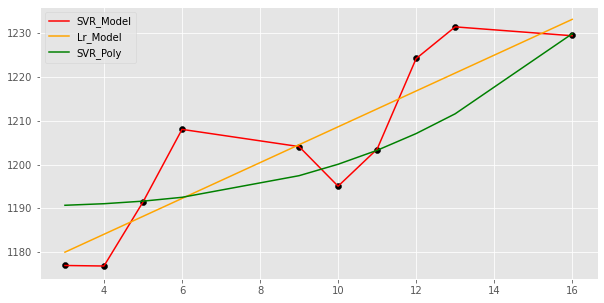

In [167]:
pr=predicting(dates_for,prices,[[25]])
print(pr)

In [1]:
### California House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing =pd.read_csv('housing_california.csv')
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AA09708>,
      dtype=object)

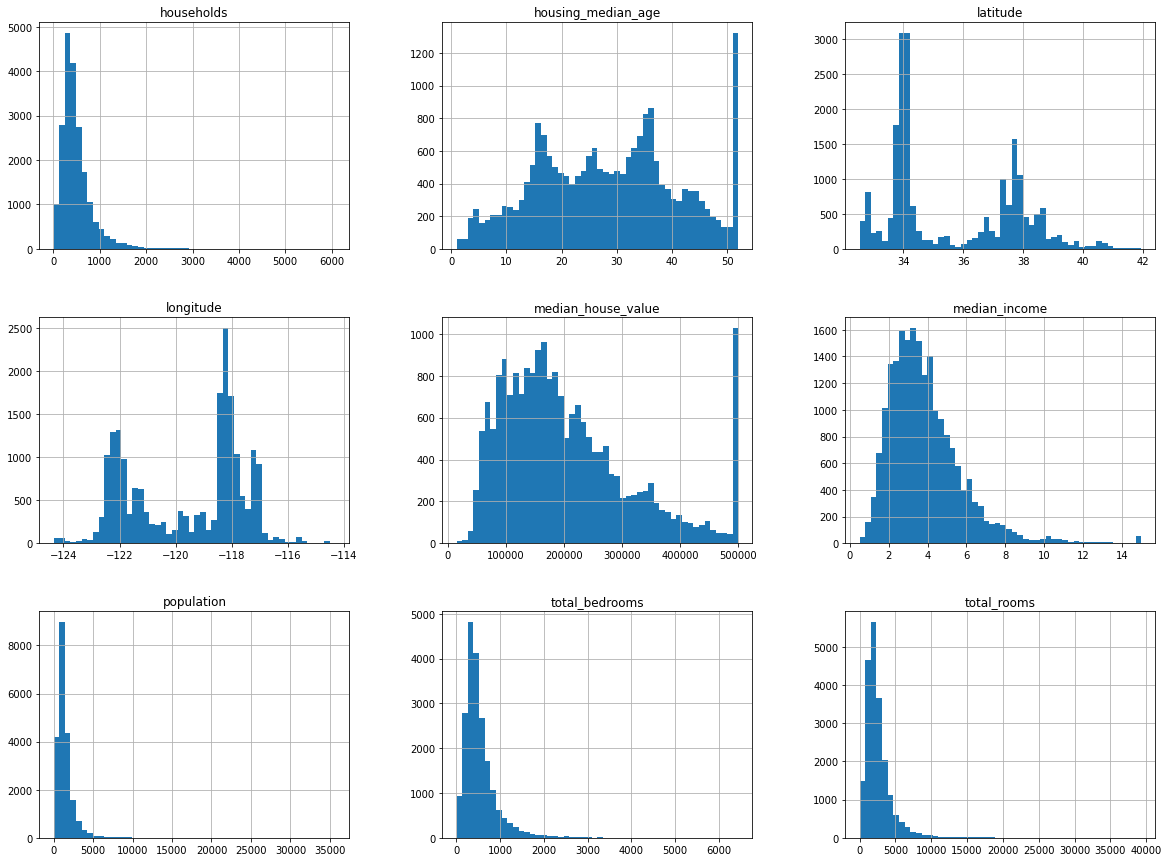

In [10]:
housing.hist(bins=50, figsize=(20,15))

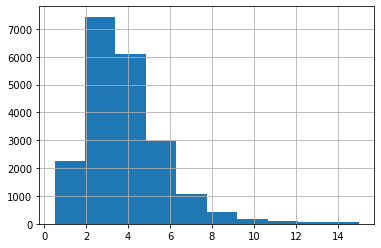

In [11]:
# Median income looks like an imp feature
housing['median_income'].hist()

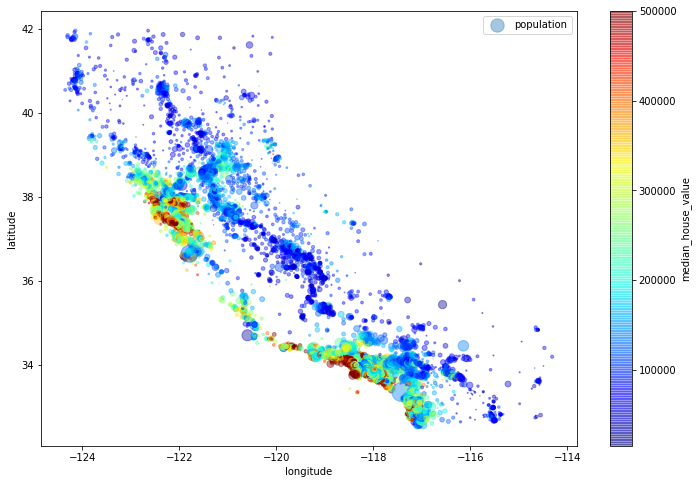

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

plt.legend()

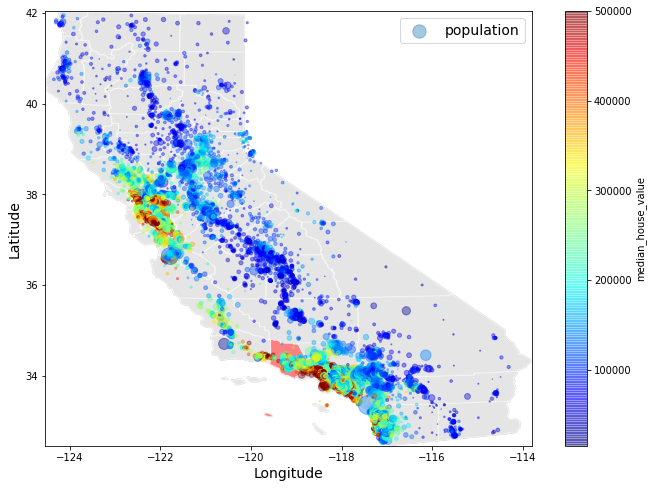

In [17]:
import matplotlib.image as mpimg

ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

# load the png image
california_img = mpimg.imread("california-png.png")

plt.imshow(california_img, extent=[-124.55, -113.8, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

In [18]:
# Preparing the data for ML algorithms

In [46]:
median=housing['total_bedrooms'].median()
housing['total_bedrooms']=housing['total_bedrooms'].fillna(median)

In [67]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [68]:
# WE can also use scikit-Learn's Imputer class to fill na values into the
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy="median")


In [69]:

housing_num=housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)


SimpleImputer(strategy='median')

using the imputer we created above, transforming the training set by replacing the missing values by the learned medians

In [71]:
X = imputer.transform(housing_num)

In [75]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [79]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

# handling categorical values

In [82]:
housing_cat=housing['ocean_proximity']
housing_cat

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [ ]:
# Using sklearn's OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder= OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(ho)

# Setting up Pipeline for all the preprocessings in one go

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attibute_names = attribute_names
        
    def fit(self, X, y=None):
        return self # do nothing
    
    def transform(self, X, y=None):
        return X[self.attibute_names].values

In [92]:
# complete Pipeline

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    
    ("std_scaler", StandardScaler())
])

cat_pipeline =Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [95]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [96]:
# Selecting & Training Models

In [98]:
housing_labels = housing["median_house_value"]

In [99]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [100]:
# trying the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [101]:
print("Prediction: ", lin_reg.predict(some_data_prepared))
print("Actual Labels: ", list(some_labels))

Prediction:  [452600. 358500. 352100. 341300. 342200.]
Actual Labels:  [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [102]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7.450245312353955e-10

In [103]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [104]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

tree_rmse_scores = np.sqrt(-scores)

# Now again coding for California Housing Price

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df= pd.read_csv('housing_california.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [89]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Preparing the stratified sampling 

In [90]:
# here we are going to divide all my income cat into 5 categories
# dividing the income category to limit the number income category

df['income_cat']=np.ceil(df['median_income']/1.5)
# putting everything above 5th category as 5th category
df['income_cat'].where(df['income_cat']<5, other=5.0, inplace=True)

In [91]:
df['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [92]:
# Here we are making stratified sampling inorder to distribute equally in ratio for Training data as well as testing data

from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in split.split(df,df['income_cat']):
    strat_train_set= df.loc[train_index]
    strat_test_set= df.loc[test_index]


In [93]:
# Now here we are checking weather income category have been distributed equal ratio in training set and testing data set. 

In [94]:
print('income cat ratio in df :',df['income_cat'].value_counts()/len(df))

print('income cat ratio in training set  :',strat_train_set['income_cat'].value_counts()/len(strat_train_set))

print('income cat ratio in testing set :',strat_test_set['income_cat'].value_counts()/len(strat_test_set))

print('as seen above the proportions are maintained in the test set using stratified sampling')

income cat ratio in df : 3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64
income cat ratio in training set  : 3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64
income cat ratio in testing set : 3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64
as seen above the proportions are maintained in the test set using stratified sampling


In [95]:
print('df len :',len(df))
print('training len', len(strat_train_set))
print('testing len', len(strat_test_set))

df len : 20640
training len 16512
testing len 4128


In [96]:
df=strat_train_set.copy()

# Correlation Matrix wrt median house value

In [97]:
corr_matrix=df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
income_cat            0.645951
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

# Preparing the data for ML algos

In [98]:
df= strat_train_set.drop('median_house_value',axis=1)
df_labels = strat_train_set['median_house_value'].copy()

In [99]:
df_num= df.drop('ocean_proximity',axis=1)

# Custom Transformations

In [100]:
from sklearn.base import BaseEstimator, TransformerMixin

# Column indexes

rooms_ix, bedrooms_ix, population_ix, household_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing to do here
    def transform(self,X, y=None):
        Rooms_per_Household= X[:, rooms_ix]/X[:,household_ix]
        Population_per_Household= X[:, population_ix]/X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            Bedrooms_per_Room= X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, Rooms_per_Household,Population_per_Household,Bedrooms_per_Room]
        else:
            return np.c_[X, Rooms_per_Household,Population_per_Household]


In [101]:
class DataFrameSelector( BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
        
    def fit (self, X, y=None):
        return self # do nothing
    def transform(self, X, y=None):
        return X[self.attribute_names].values

# Creating Pipeline for all my data like numerical as well as categorical

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Completer Pipeline

num_attribs= list(df_num.columns)
cat_attribs= ['ocean_proximity']

num_pipline= Pipeline([
    ("Selectors",DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())
])

cat_pipline= Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

# Now combining all pipeline using Feature Union
from sklearn.pipeline import FeatureUnion

full_pipeline= FeatureUnion(transformer_list=[
    ('num_pipline', num_pipline),
    ('cat_pipline', cat_pipline)
])

housing_prepared= full_pipeline.fit_transform(df)

In [103]:
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

# Selecting & Training Models

In [104]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(housing_prepared, df_labels)



LinearRegression()

In [106]:
# Trying the full pipeline on a few training instances

some_data= df.iloc[:5]
some_labels= df_labels.iloc[:5]

some_data_prepared= full_pipeline.transform(some_data)


In [107]:
print("Prediction :", lin_reg.predict(some_data_prepared))
print("Actual Lablels :", list(some_labels))

Prediction : [209472. 449568. 257568. 174592. 111904.]
Actual Lablels : [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [1]:
### A rough coding for KC_House price prediction

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion

In [46]:
data= pd.read_csv('kc_house_data - Copy1.csv')
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,13-10-14,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,09-12-14,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,25-02-15,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,09-12-14,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,18-02-15,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [47]:
#DataFrame's Feature Selector

class FeatureSelector(BaseEstimator,TransformerMixin):
    def __init__(self, Feature_names):
        
        self._Feature_names= Feature_names
        
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[ self._Feature_names ]

In [48]:
# Categorical Pipeline

#Custom transformer that breaks dates column into year, month and day into separate columns and
#converts certain features to binary 
class CategoricalTransformer( BaseEstimator, TransformerMixin ):
    #Class constructor method that takes in a list of values as its argument
    def __init__(self, use_dates = ['year', 'month', 'day'] ):
        self._use_dates = use_dates
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        return self

    #Helper function to extract year from column 'dates' 
    def get_year( self, obj ):
        return str(obj)[:4]
    
    #Helper function to extract month from column 'dates'
    def get_month( self, obj ):
        return str(obj)[4:6]
    
    #Helper function to extract day from column 'dates'
    def get_day(self, obj):
        return str(obj)[6:8]
    
    #Helper function that converts values to Binary depending on input 
    def create_binary(self, obj):
        if obj == 0:
            return 'No'
        else:
            return 'Yes'
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
       #Depending on constructor argument break dates column into specified units
       #using the helper functions written above 
       for spec in self._use_dates:
        
        exec( "X.loc[:,'{}'] = X['date'].apply(self.get_{})".format( spec, spec ) )
       #Drop unusable column 
       X = X.drop('date', axis = 1 )
       
       #Convert these columns to binary for one-hot-encoding later
       X.loc[:,'waterfront'] = X['waterfront'].apply( self.create_binary )
       
       X.loc[:,'view'] = X['view'].apply( self.create_binary )
       
       X.loc[:,'yr_renovated'] = X['yr_renovated'].apply( self.create_binary )
       #returns numpy array
       return X.values 
            

In [49]:
# NumericalTransformation

class NumericalTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, bath_per_bed=True, years_old=True):
        self._bath_per_bed= bath_per_bed
        self._years_old = years_old
        
    def fit(self, X, y=None):
        return self
    
    def transform( self, X, y=None):
        if self._bath_per_bed:
            
             X.loc[:,'bath_per_bed']= X['bathrooms']/X['bedrooms']
        
             X.drop('bathrooms', axis=1)  # dropping column
       
        
        if self._years_old:
            
            X.loc[:,'years_old']= 2019-X['yr_built']
        
            X.drop('yr_built', axis=1) # dropping column
        
        
        
        # Convert inf values into nan values
        X=X.replace([np.inf,-np.inf],np.nan)
        return X.values
        
        
        
        


In [52]:


#Categrical features to pass down the categorical pipeline 
categorical_features = ['date', 'waterfront', 'view', 'yr_renovated']

#Numerical features to pass down the numerical pipeline 
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                'condition', 'grade', 'sqft_basement', 'yr_built']


# Categorical_pipline
categorical_pipeline= Pipeline(steps=[('cat_selector',FeatureSelector(categorical_features)),
                                     ('cat_tranformer', CategoricalTransformer()),
                                     ('one_hot_encoder', OneHotEncoder(sparse=False))])

# Numerical_pipeline

numerical_pipeline= Pipeline(steps=[('num_selector', FeatureSelector(numerical_features)),
                                   ('num_tranformer', NumericalTransformer()),
                                   ('imputer', SimpleImputer(strategy='median')),
                                   ('std_scaler', StandardScaler())])



# # Combining the pipeline together
full_pipeline= FeatureUnion(transformer_list=[('categorical_pipeline', categorical_pipeline),
                                              ('numerical_pipeline', numerical_pipeline)])


In [55]:
# Now applying model
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=data.drop('price', axis=1)
y= data['price']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

full_pipeline_m= Pipeline(steps=[('full_pipeline',full_pipeline),
                                ('model',LinearRegression())])


full_pipeline_m.fit(X_train,y_train)

y_pred= full_pipeline_m.predict(X_test)


C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [62]:
print(y_pred)

[127248. 313456. 333792. ... 513072. 382432. 233600.]


In [1]:
# Now testing Multiple Algorithm on IRIS dataset and checking accuracy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
dataset= sns.load_dataset('iris')

In [21]:
dataset.shape

(150, 5)

In [20]:
dataset.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

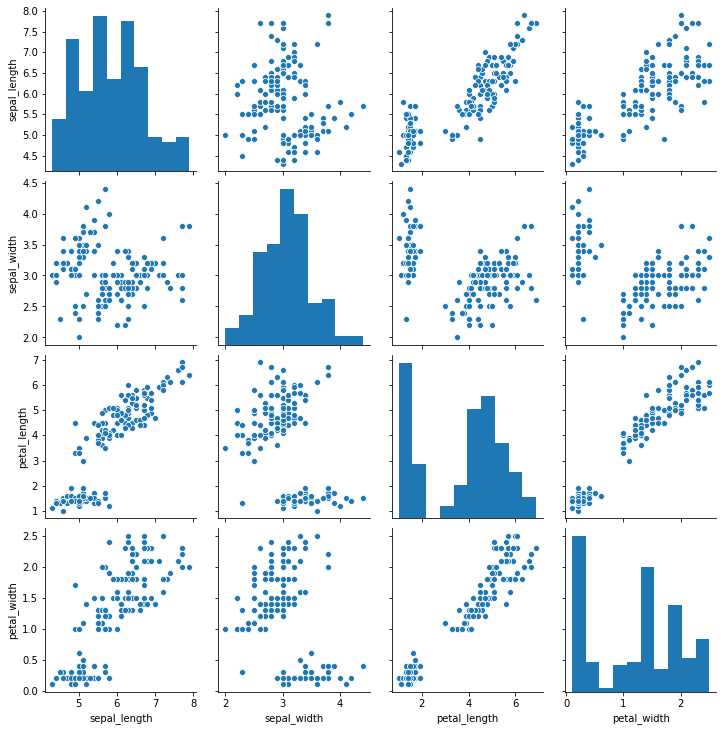

In [33]:
sns.pairplot(dataset)

In [40]:
array=dataset.values
X=array[:,0:4]
y=array[:,4]


In [41]:
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2)

In [43]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [44]:
# Building Model

In [65]:
#Spot Check Algorithms

models=[]
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC(gamma='auto')))

#Evaluate each model in turn
results=[]
names=[]

for name,model in models:
    kfold= StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,X_train,y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s:%f(%f)'%(name,cv_results.mean(),cv_results.std()))


LR:0.975000(0.038188)
LDA:0.983333(0.033333)
KNN:0.958333(0.041667)
CART:0.983333(0.033333)
SVM:0.983333(0.033333)


In [67]:
# a very useful way to compare its accuracy is boxplot

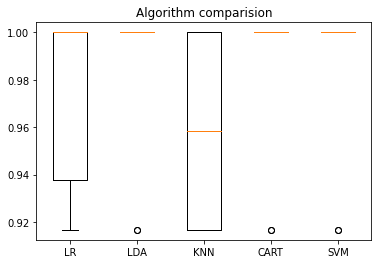

In [74]:
plt.boxplot(results, labels=names)
plt.title('Algorithm comparision')
plt.show()

In [75]:
# Make prediction on validation datset
model= SVC(gamma='auto')
model.fit(X_train,y_train)
predictions= model.predict(X_test)

In [76]:
#Evalution matrics

In [78]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9666666666666667
[[10  0  0]
 [ 0  7  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.88      0.93         8
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [80]:
df=pd.DataFrame({'y_test':y_test,'y_Pred':predictions})

In [88]:
# again ckecing all algorithm for IRIS DATA dets

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [97]:
dataset=sns.load_dataset('iris')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [103]:
array=dataset.values
X= array[:,:4]
y=array[:,4]


In [104]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

In [106]:
models=[]

models.append(('LR',LogisticRegression(solver='liblinear',multi_class='auto')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))



In [119]:
results=[]
names=[]

for name, model in models:
    kFold=StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
    cv_results= cross_val_score(model,X_train,y_train,cv=kFold)
    results.append(cv_results)
    names.append(name)
    print('%s  :%f  (%f)'%(name, cv_results.mean(),cv_results.std()))



LR  :0.950000  (0.040825)
LDA  :0.975000  (0.038188)
CART  :0.941667  (0.065085)
SVM  :0.966667  (0.040825)
KNN  :0.966667  (0.040825)
NB  :0.966667  (0.055277)


In [121]:
model= DecisionTreeClassifier()

model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [126]:
df=pd.DataFrame({'Y_test':y_test,'y_pred':predictions})
df.head()

,Y_test,y_pred
0,virginica,virginica
1,setosa,setosa
2,versicolor,versicolor
3,virginica,virginica
4,virginica,virginica


In [128]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9666666666666667
[[13  0  0]
 [ 0  7  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.88      0.93         8
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### Image classification ML algorithm

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os

In [29]:
target=[]
images=[]
flate_data=[]

DATADIR='images'
CATAGORIES=['ice cream con','pretty sunflower','rugby ball']

for category in CATAGORIES:
    class_num= CATAGORIES.index(category)
    path= os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array= imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3))
        img_flat= img_resized.flatten()
        images.append(img_resized)
        flate_data.append(img_flat)
        target.append(class_num)
        
images= np.array(images)
target= np.array(target)
flate_data= np.array(flate_data)

'''I am going to apply Support Vector Machine Algorithm but for optimum result we have to find best param
therefor i am applying GradSearchCV method'''

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(flate_data, target, test_size=0.2, random_state=109)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid=[{'C':[10,100,1000,10000],'kernel':['linear']},
             {'C':[10,100,1000,10000],'gamma':[0.1,0.001,0.0001,0.00001],'kernel':['rbf']},
            {'C':[10,100,1000,10000],'gamma':[0.1,0.001,0.0001,0.00001],'kernel':['poly']},
           {'C':[10,100,1000,10000],'gamma':[0.1,0.001,0.0001,0.00001],'kernel':['sigmoid']}]


svm_model= SVC(probability=True)
# model_fit= svm_model.fit(X_train,y_train)
clf= GridSearchCV(svm_model,param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [10, 100, 1000, 10000], 'kernel': ['linear']},
                         {'C': [10, 100, 1000, 10000],
                          'gamma': [0.1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']},
                         {'C': [10, 100, 1000, 10000],
                          'gamma': [0.1, 0.001, 0.0001, 1e-05],
                          'kernel': ['poly']},
                         {'C': [10, 100, 1000, 10000],
                          'gamma': [0.1, 0.001, 0.0001, 1e-05],
                          'kernel': ['sigmoid']}])

In [39]:
clf.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
svm_model= SVC(C=10, gamma=0.0001, kernel='rbf')
model_fit= svm_model.fit(X_train,y_train)

In [41]:
y_pred= model_fit.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.9444444444444444

In [44]:
confusion_matrix(y_test,y_pred)

array([[4, 0, 0],
       [1, 8, 0],
       [0, 0, 5]], dtype=int64)

Enter the image urlImage_2.jpg
(900, 1600, 3)
Predicted output is ice cream con


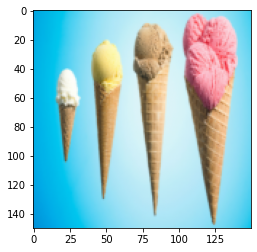

In [52]:
# now checking our model
flat_data=[]

url= input('Enter the image url')
img= imread(url)
img_resized= resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)

y_out= model_fit.predict(flat_data)
y_out= CATAGORIES[y_out[0]]
print(f'Predicted output is {y_out}')


In [ ]:
# Making the full pipeline(using dataframeselector, CategoricalTransformer, NumericalTransformer) for kc-house data prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
df= pd.read_csv('kc_house_data - Copy1.csv')

In [103]:
df= pd.read_csv('kc_house_data.csv')

In [104]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [105]:
df['date']=pd.to_datetime(df['date'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin


# I am going to make a custome dataframe selector function using class function

class  DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_names):
        self._feature_names= feature_names
                
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self._feature_names]

In [92]:
# Categorical tranformer

class CategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, use_dates=['year','month','day']):
        self._use_dates= use_dates
        
    def fit( self, X, y=None):
        return self
    
    def get_year(self,obj):
        return str(obj)[:4]
    
    def get_month(self, obj):
        return str(obj)[5:7]
    
    def get_day( self, obj):
        return str(obj)[8:10]
    
    def create_binary(self,obj):
        if obj==0:
            return 'No'
        else:
            return 'Yes'
        
        # Tranformer Method we wrote for this transforme
    def transform( self,X, y=None ):
        for spec in self._use_dates:
            exec("X.loc[:,'{}']=X['date'].apply(self.get_{})".format(spec,spec))
        
        #Droping the unusable column
        X=X.drop('date', axis=1)
        X.loc[:,'waterfront']= X['waterfront'].apply(self.create_binary)
        X.loc[:,'view']=X['view'].apply(self.create_binary)
        X.loc[:,'yr_renovated']=X['yr_renovated'].apply(self.create_binary)
        
        return X

In [93]:
# Numerical Tranformer

class NumericalTransformer( BaseEstimator, TransformerMixin):
    
    def __init__(self, bath_per_bed= True, years_old=True,):
        
        self._bath_per_bed= bath_per_bed
        self._years_old= years_old
        
    def fit( self, X,y=None):
        return self
    
    def transform(self, X, y=None):
        if self._bath_per_bed:
            # Create new column
            X.loc[:,'bath_per_bed']=X['bathrooms']/X['bedrooms']
            # Deleting unusable column
            X.drop('bathrooms', axis=1)
        if self._years_old:
            X.loc[:,'years_old']= 2020-X['yr_built']
            # Droping redundant column
            X.drop('yr_built', axis=1)
            
        X= X.replace([np.inf,-np.inf],np.nan)
        return X


In [94]:
# Creating Pipeline  for Categorical as well as Numerical Features
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# categorical Feature Pipeline
cat_feat=['date','waterfront','view','yr_renovated']

categorical_pipeline = Pipeline(steps=[('cat_selector',DataFrameSelector(cat_feat)),
                                      ('cat_tranformer',CategoricalTransformer()),
                                      ('One_Hot_Encoder', OneHotEncoder())])

# Numerical Feature pipeline

num_feat= ['bedrooms','bathrooms','sqft_living','sqft_lot','floors',
              'condition','grade','sqft_basement','yr_built']

numerical_pipeline=Pipeline( steps=[('num_selector',DataFrameSelector(num_feat)),
                                   ('num_transformer',NumericalTransformer()),
                                   ('imputer', SimpleImputer(strategy='median')),
                                   ('std_scaler',StandardScaler())])


# Now making a big Pipeline for both categorical and Numerical feature by combining both created pipeline

full_pipeline= FeatureUnion(transformer_list=[('categorical_pipeline', categorical_pipeline),
                                             ('numerical_pipeline', numerical_pipeline)])




### Applying Machine Learning Model to the housing dataset  

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df.drop('price', axis=1)
y=df['price']


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

full_pipeline_m= Pipeline(steps=[('full_pipeline', full_pipeline),
                                   ('model', LinearRegression())])

full_pipeline_m.fit(X_train, y_train)

y_pred= full_pipeline_m.predict(X_test)

C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\Zeeshan Haleem\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [1]:
import pandas as pd

In [1]:
!jt -h

usage: jt [-h] [-l] [-t THEME] [-f MONOFONT] [-fs MONOSIZE] [-nf NBFONT]
          [-nfs NBFONTSIZE] [-tf TCFONT] [-tfs TCFONTSIZE] [-dfs DFFONTSIZE]
          [-ofs OUTFONTSIZE] [-mathfs MATHFONTSIZE] [-m MARGINS]
          [-cursw CURSORWIDTH] [-cursc CURSORCOLOR] [-cellw CELLWIDTH]
          [-lineh LINEHEIGHT] [-altp] [-altmd] [-altout] [-P] [-T] [-N] [-kl]
          [-vim] [-r] [-dfonts]

optional arguments:
  -h, --help            show this help message and exit
  -l, --list            list available themes
  -t THEME, --theme THEME
                        theme name to install
  -f MONOFONT, --monofont MONOFONT
                        monospace code font
  -fs MONOSIZE, --monosize MONOSIZE
                        code font-size
  -nf NBFONT, --nbfont NBFONT
                        notebook font
  -nfs NBFONTSIZE, --nbfontsize NBFONTSIZE
                        notebook fontsize
  -tf TCFONT, --tcfont TCFONT
                        txtcell font
  -tfs TCFONTSIZE, --tcfontsize TCF

In [2]:
!jt -t T

Didn't recognize theme name: T
Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [2]:
!jt -t monokai-T

Didn't recognize theme name: monokai-T
Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [69]:
!jt -t onedork -T

## SIR model for pendemic 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scipy.

In [6]:
from scipy.integrate import odeint

In [9]:
N=1000;
beta=1/3;
gamma=1/14;

In [26]:
S0=999
I0=1
R0=0

In [46]:
def model22(y,t, N,beta, gamma):
    S,I,R = y                       # y is a vector of S, I and R  
    dSdt=-(beta*S*I)/N
    dIdt=(beta*S*I)/N-gamma*I
    dRdt=gamma*I
    return dSdt,dIdt,dRdt

In [47]:
t=np.linspace(0,160,161)

In [48]:
y0=S0,I0,R0

In [50]:
sol=odeint(model22,y0, t, args=(N,beta,gamma))

In [56]:
df=pd.DataFrame(sol,columns=['S','I','R'])

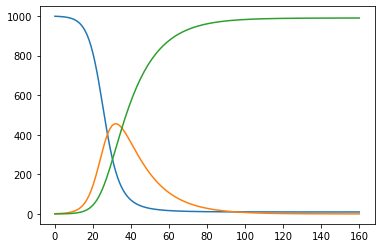

In [55]:
plt.plot(t,sol)

In [68]:
y

(2, 1, 3)

# Rough RNN_LSTM_Model for price predictiuon

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [3]:
from datetime import datetime

In [5]:
# start=datetime(2014,8,1)
# end=datetime(2020,5,1)
# df= web.DataReader("AAPL",data_source='yahoo',start='01/08/2014', end='01/07/2021')

In [273]:
df=pd.read_csv('AAPL_1.csv')
# df=web.DataReader('AAPL',data_source='yahoo',start='2014-08-19', end='2020-06-22')

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1471 non-null   datetime64[ns]
 1   Open       1471 non-null   float64       
 2   High       1471 non-null   float64       
 3   Low        1471 non-null   float64       
 4   Close      1471 non-null   float64       
 5   Adj Close  1471 non-null   float64       
 6   Volume     1471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 80.6 KB


In [296]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_of_week,Day_name1,Day_name2
1466,2020-06-16,87.864998,88.300003,86.180000,88.019997,87.430885,165428800,Tuesday,Tuesday,Tuesday
1467,2020-06-17,88.787498,88.849998,87.772499,87.897499,87.309204,114406400,Wednesday,Wednesday,Wednesday
1468,2020-06-18,87.852501,88.362503,87.305000,87.932503,87.343979,96820400,Thursday,Thursday,Thursday
1469,2020-06-19,88.660004,89.139999,86.287498,87.430000,86.844833,264476000,Friday,Friday,Friday
1470,2020-06-22,87.834999,89.864998,87.787498,89.717499,89.117027,135445200,Monday,Monday,Monday


In [288]:
# import datetime as dt
# df['Date']=pd.to_datetime(df['Date'])
# df['Day_name1']= df['Date'].dt.day_name()
# df['Day_name2']=df['Date'].apply(lambda x: x.day_name())

In [8]:
df=df['Open'].values
df=df.reshape(-1,1)
print(df.shape)
df[:5]



(1471, 1)


array([[24.852501],
       [25.110001],
       [25.1425  ],
       [25.0725  ],
       [25.4475  ]])

In [9]:
trainset= np.array(df[:int(df.shape[0]*0.80)])
testset=np.array(df[int(df.shape[0]*0.80)-50:])

In [10]:
sc= MinMaxScaler(feature_range=(0,1))
trainset=sc.fit_transform(trainset)
trainset[:5]

array([[0.06684191],
       [0.07415829],
       [0.07508169],
       [0.07309277],
       [0.08374769]])

In [11]:
sc= MinMaxScaler(feature_range=(0,1))
testset=sc.fit_transform(testset)
testset[:5]

array([[0.        ],
       [0.01106575],
       [0.00596263],
       [0.01289212],
       [0.00386766]])

In [12]:
print('Trainset len :',len(trainset))
print('Testset len :', len(testset))
print('df len:', len(df))

Trainset len : 1176
Testset len : 345
df len: 1471


In [13]:
def createdataset(data):
    X,Y=[],[]
    for i in range(50,len(data)):
        X.append(data[i-50:i,0])
        Y.append(data[i,0])
        
    X=np.array(X)
    Y=np.array(Y)
    
    return X,Y

In [14]:
X_train, Y_train =createdataset(trainset)

In [15]:
X_test, Y_test =createdataset(testset)

### Nowe reshapping for LSTM Model 

In [16]:
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [17]:
X_train.shape[1]

50

### Building model

In [18]:
# model= Sequential()
# model.add(LSTM(units=96, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=96, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=96, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=96))
# model.add(Dropout(0.2))

# model.add(Dense(units=1))

# model.compile(loss='mean_squared_error',optimizer='adam')


In [19]:
model= Sequential()

model.add( LSTM(units=96, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add( LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

model.add( LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [21]:
model.fit(X_train,Y_train, epochs=50, batch_size=32)

Epoch 1/50
36/36 [==============================] - 24s 232ms/step - loss: 0.0433
Epoch 2/50
36/36 [==============================] - 8s 221ms/step - loss: 0.0057
Epoch 3/50
36/36 [==============================] - 8s 214ms/step - loss: 0.0039
Epoch 4/50
36/36 [==============================] - 8s 212ms/step - loss: 0.0034
Epoch 5/50
36/36 [==============================] - 8s 211ms/step - loss: 0.0033
Epoch 6/50
36/36 [==============================] - 8s 212ms/step - loss: 0.0030
Epoch 7/50
36/36 [==============================] - 8s 212ms/step - loss: 0.0032
Epoch 8/50
36/36 [==============================] - 8s 223ms/step - loss: 0.0031
Epoch 9/50
36/36 [==============================] - 8s 217ms/step - loss: 0.0028
Epoch 10/50
36/36 [==============================] - 8s 212ms/step - loss: 0.0028
Epoch 11/50
36/36 [==============================] - 8s 215ms/step - loss: 0.0033
Epoch 12/50
36/36 [==============================] - 8s 216ms/step - loss: 0.0028
Epoch 13/50
36/36 [=====

In [272]:
predictions=model.predict(X_test)

In [23]:
pred=sc.inverse_transform(predictions)

In [24]:
pred.shape

(295, 1)

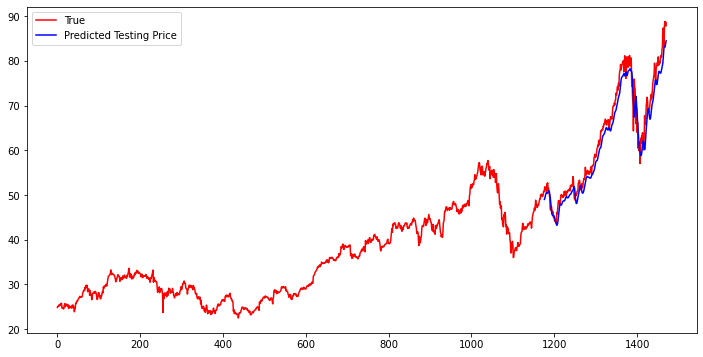

In [25]:
fig, ax= plt.subplots(figsize=(12,6))
plt.plot(df, color='r', label='True')
ax.plot(range(len(Y_train)+50,len(Y_train)+50+len(pred)),pred, color='blue', label='Predicted Testing Price')
plt.legend()

In [36]:
Y_test_res= Y_test.reshape(-1,1)

In [38]:
Y_test_res[:2]

array([[0.19037382],
       [0.20611301]])

In [39]:
Y_test_converted= sc.inverse_transform(Y_test_res)

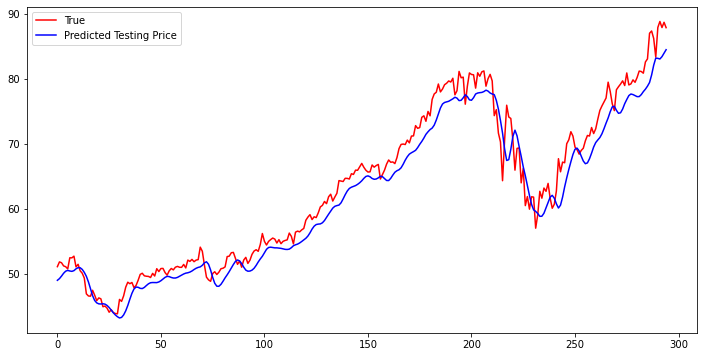

In [43]:
fig, ax= plt.subplots(figsize=(12,6))
plt.plot(Y_test_converted, color='r', label='True')
ax.plot(pred, color='blue', label='Predicted Testing Price')
plt.legend()

## 2 rough model for prediction

In [4]:
import yfinance as yf
data = yf.download('MSFT', start = '2012-01-01', end='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.749044,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,22.260885,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.488358,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.837715,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.537107,59706800
...,...,...,...,...,...,...
2016-12-23,63.450001,63.540001,62.799999,63.240002,59.019516,12403800
2016-12-27,63.209999,64.070000,63.209999,63.279999,59.056839,11763200
2016-12-28,63.400002,63.400002,62.830002,62.990002,58.786201,14653300


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [62]:
df=pd.read_csv('AAPL_1.csv')

In [63]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')

In [64]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
30,2014-01-10,25.147499,25.172501,24.674999,24.795000,22.417862,205965200
72,2014-01-12,29.702499,29.812500,27.817499,28.767500,26.122288,335256000
9,2014-02-09,25.764999,25.934999,25.680000,25.825001,23.349112,214256000
31,2014-02-10,24.817499,25.055000,24.510000,24.975000,22.580605,191031200
73,2014-02-12,28.375000,28.937500,28.187500,28.657499,26.022408,237395600
...,...,...,...,...,...,...,...
1463,2020-11-06,87.327499,87.764999,83.870003,83.974998,83.412964,201662400
1380,2020-12-02,80.367500,81.805000,80.367500,81.800003,81.033165,113730400
1400,2020-12-03,63.985001,67.500000,62.000000,62.057499,61.475739,418474000
1442,2020-12-05,79.457497,79.922501,77.727501,77.852501,77.331436,162301200


In [65]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [66]:
trainset_data=df[df['Date']<'2018-12-20'].copy()
testset_data=df[df['Date']>='2018-12-20'].copy()

In [67]:
trainset_data

,Date,Open,High,Low,Close,Adj Close,Volume
30,2014-01-10,25.147499,25.172501,24.674999,24.795000,22.417862,205965200
72,2014-01-12,29.702499,29.812500,27.817499,28.767500,26.122288,335256000
9,2014-02-09,25.764999,25.934999,25.680000,25.825001,23.349112,214256000
31,2014-02-10,24.817499,25.055000,24.510000,24.975000,22.580605,191031200
73,2014-02-12,28.375000,28.937500,28.187500,28.657499,26.022408,237395600
...,...,...,...,...,...,...,...
1088,2018-12-13,42.622501,43.142502,42.387501,42.737499,41.611404,127594400
1089,2018-12-14,42.250000,42.270000,41.320000,41.369999,40.279934,162814800
1090,2018-12-17,41.362499,42.087502,40.682499,40.985001,39.905083,177151600
1091,2018-12-18,41.345001,41.882500,41.097500,41.517502,40.423550,135366000


In [68]:
testset_data

,Date,Open,High,Low,Close,Adj Close,Volume
1093,2018-12-20,40.099998,40.527500,38.825001,39.207500,38.174412,259092000
1094,2018-12-21,39.215000,39.540001,37.407501,37.682499,36.689594,382978400
1095,2018-12-24,37.037498,37.887501,36.647499,36.707500,35.740280,148676800
1096,2018-12-26,37.075001,39.307499,36.680000,39.292500,38.257172,234330000
1097,2018-12-27,38.959999,39.192501,37.517502,39.037498,38.008892,212468400
...,...,...,...,...,...,...,...
1463,2020-11-06,87.327499,87.764999,83.870003,83.974998,83.412964,201662400
1380,2020-12-02,80.367500,81.805000,80.367500,81.800003,81.033165,113730400
1400,2020-12-03,63.985001,67.500000,62.000000,62.057499,61.475739,418474000
1442,2020-12-05,79.457497,79.922501,77.727501,77.852501,77.331436,162301200


In [ ]:
# df=df['Open'].values
# df=df.reshape(-1,1)

In [85]:
Trainset= trainset_data['Open'].values
Trainset=Trainset.reshape(-1,1)
Trainset[:5]

array([[25.147499],
       [29.702499],
       [25.764999],
       [24.817499],
       [28.375   ]])

In [86]:
Testset=testset_data['Open'].values
Testset=Testset.reshape(-1,1)
Testset[:5]

array([[40.099998],
       [39.215   ],
       [37.037498],
       [37.075001],
       [38.959999]])

In [88]:
print('trainset :', Trainset.shape)
print('testet :', Testset.shape)
print('df :',df.shape)

trainset : (1093, 1)
testet : (378, 1)
df : (1471, 7)


In [89]:
sc= MinMaxScaler(feature_range=(0,1))

In [90]:
Trainset=sc.fit_transform(Trainset)
Testset=sc.fit_transform(Testset)

In [91]:
def creat1(data):
    X=[]
    Y=[]
    for i in range(50,data.shape[0]):
        X.append(data[i-50:i,0])
        Y.append(data[i,0])
    X= np.array(X)
    Y=np.array(Y)
    
    return X, Y
        

In [92]:
X_train, Y_train =creat1(Trainset)
X_test, Y_test= creat1(Testset)

In [93]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [94]:
print('test :',X_test.shape,'train :',X_train.shape,'df :',df.shape)

test : (328, 50, 1) train : (1043, 50, 1) df : (1471, 7)


#MOdel 

In [95]:
model=Sequential()

model.add(LSTM(units=96, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
          
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
          
model.add(LSTM(units=96))
model.add(Dropout(0.2))          
          
model.add(Dense(units=1))
          
model.compile(loss='mean_squared_error',optimizer='adam')

In [96]:
model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
33/33 [==============================] - 21s 200ms/step - loss: 0.0570
Epoch 2/50
33/33 [==============================] - 7s 209ms/step - loss: 0.0098
Epoch 3/50
33/33 [==============================] - 6s 196ms/step - loss: 0.0103 2s
Epoch 4/50
33/33 [==============================] - 6s 194ms/step - loss: 0.0090
Epoch 5/50
33/33 [==============================] - 6s 193ms/step - loss: 0.0091
Epoch 6/50
33/33 [==============================] - 6s 191ms/step - loss: 0.0090
Epoch 7/50
33/33 [==============================] - 6s 193ms/step - loss: 0.0100
Epoch 8/50
33/33 [==============================] - 6s 192ms/step - loss: 0.0101
Epoch 9/50
33/33 [==============================] - 6s 193ms/step - loss: 0.0117
Epoch 10/50
33/33 [==============================] - 6s 194ms/step - loss: 0.0090
Epoch 11/50
33/33 [==============================] - 6s 194ms/step - loss: 0.0090
Epoch 12/50
33/33 [==============================] - 6s 193ms/step - loss: 0.0106
Epoch 13/50
33/33 [==

In [97]:
Pred=model.predict(X_test)       # It is basically predicting Y_test

In [98]:
Prediction1= sc.inverse_transform(Pred)

In [154]:
Prediction1

array([[48.79031 ],
       [49.825447],
       [50.552483],
       [51.086292],
       [52.01211 ],
       [51.979156],
       [50.938774],
       [49.360134],
       [47.70951 ],
       [46.32856 ],
       [45.337044],
       [44.82745 ],
       [44.866817],
       [45.31735 ],
       [46.05085 ],
       [46.919666],
       [47.79771 ],
       [48.594448],
       [48.582436],
       [48.098038],
       [47.563824],
       [47.39579 ],
       [47.268063],
       [47.49182 ],
       [48.30126 ],
       [49.96817 ],
       [52.130135],
       [53.2302  ],
       [53.188263],
       [52.450233],
       [51.47169 ],
       [50.504574],
       [49.669796],
       [49.030373],
       [48.587044],
       [48.331867],
       [48.308727],
       [48.508736],
       [48.541164],
       [48.4914  ],
       [48.82553 ],
       [49.415462],
       [50.331356],
       [51.282787],
       [52.20913 ],
       [53.637005],
       [55.4009  ],
       [55.824215],
       [54.875813],
       [53.176304],


In [146]:
len(Prediction1)

328

In [125]:
Prediction1

array([[48.79031 ],
       [49.825447],
       [50.552483],
       [51.086292],
       [52.01211 ],
       [51.979156],
       [50.938774],
       [49.360134],
       [47.70951 ],
       [46.32856 ],
       [45.337044],
       [44.82745 ],
       [44.866817],
       [45.31735 ],
       [46.05085 ],
       [46.919666],
       [47.79771 ],
       [48.594448],
       [48.582436],
       [48.098038],
       [47.563824],
       [47.39579 ],
       [47.268063],
       [47.49182 ],
       [48.30126 ],
       [49.96817 ],
       [52.130135],
       [53.2302  ],
       [53.188263],
       [52.450233],
       [51.47169 ],
       [50.504574],
       [49.669796],
       [49.030373],
       [48.587044],
       [48.331867],
       [48.308727],
       [48.508736],
       [48.541164],
       [48.4914  ],
       [48.82553 ],
       [49.415462],
       [50.331356],
       [51.282787],
       [52.20913 ],
       [53.637005],
       [55.4009  ],
       [55.824215],
       [54.875813],
       [53.176304],


In [114]:
testset_data

,Date,Open,High,Low,Close,Adj Close,Volume
1093,2018-12-20,40.099998,40.527500,38.825001,39.207500,38.174412,259092000
1094,2018-12-21,39.215000,39.540001,37.407501,37.682499,36.689594,382978400
1095,2018-12-24,37.037498,37.887501,36.647499,36.707500,35.740280,148676800
1096,2018-12-26,37.075001,39.307499,36.680000,39.292500,38.257172,234330000
1097,2018-12-27,38.959999,39.192501,37.517502,39.037498,38.008892,212468400
...,...,...,...,...,...,...,...
1463,2020-11-06,87.327499,87.764999,83.870003,83.974998,83.412964,201662400
1380,2020-12-02,80.367500,81.805000,80.367500,81.800003,81.033165,113730400
1400,2020-12-03,63.985001,67.500000,62.000000,62.057499,61.475739,418474000
1442,2020-12-05,79.457497,79.922501,77.727501,77.852501,77.331436,162301200


In [119]:
testset_data.iloc[50:,:2]

,Date,Open
1226,2019-03-07,50.820000
1268,2019-03-09,51.607498
1290,2019-03-10,54.607498
1332,2019-03-12,64.577499
1148,2019-03-13,45.562500
...,...,...
1463,2020-11-06,87.327499
1380,2020-12-02,80.367500
1400,2020-12-03,63.985001
1442,2020-12-05,79.457497


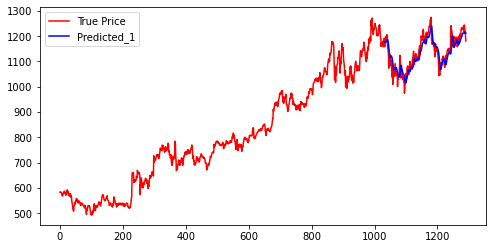

In [133]:
fig,ax= plt.subplots(figsize=(8,4))
plt.plot(df,color='red', label='True Price')
ax.plot(range(len(Y_train)+50,len(Y_train)+50+len(Prediction1)),Prediction1, color='blue', label='Predicted_1')
plt.legend()

In [137]:
Pred_2=np.reshape(Pred,(Pred.shape[0],Pred.shape[1],1))

In [138]:
Pred_2.shape


(259, 1, 1)

In [139]:
Pred_3=model.predict(Pred_2)

In [141]:
Pred_3=sc.inverse_transform(Pred_3)

In [142]:
Pred_3

array([[1027.4517 ],
       [1027.4639 ],
       [1027.4012 ],
       [1027.3682 ],
       [1027.4066 ],
       [1027.5272 ],
       [1027.7379 ],
       [1027.9249 ],
       [1028.1143 ],
       [1028.2343 ],
       [1028.0798 ],
       [1027.5826 ],
       [1026.8816 ],
       [1026.0994 ],
       [1025.1042 ],
       [1024.1603 ],
       [1023.4642 ],
       [1023.0669 ],
       [1023.03015],
       [1023.2711 ],
       [1023.50366],
       [1023.6118 ],
       [1023.4834 ],
       [1023.25195],
       [1022.8903 ],
       [1022.2936 ],
       [1021.6967 ],
       [1020.99384],
       [1020.36365],
       [1019.99115],
       [1019.91833],
       [1020.0062 ],
       [1020.06085],
       [1020.10126],
       [1020.2475 ],
       [1020.45746],
       [1020.6026 ],
       [1020.5476 ],
       [1020.3152 ],
       [1019.974  ],
       [1019.6602 ],
       [1019.44653],
       [1019.14856],
       [1018.82007],
       [1018.5209 ],
       [1018.3179 ],
       [1018.2423 ],
       [1018.

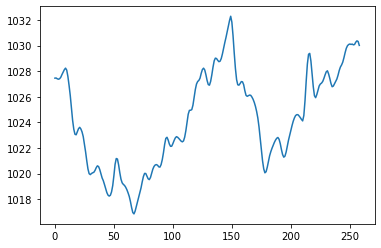

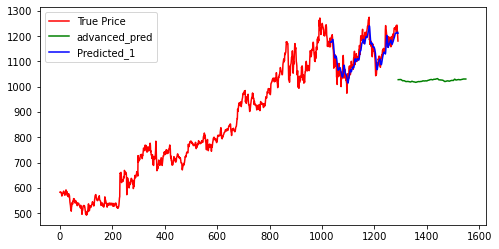

In [154]:
fig,ax= plt.subplots(figsize=(8,4))
plt.plot(df,color='red', label='True Price')
ax.plot(range(len(Y_train)+len(Pred)+50,len(Y_train)+len(Pred)+50+len(Pred_3)),Pred_3, color='g',label='advanced_pred')
ax.plot(range(len(Y_train)+50,len(Y_train)+50+len(Prediction1)),Prediction1, color='blue', label='Predicted_1')
plt.legend()